In [88]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

In [89]:
files = glob.glob('../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/*.csv')
files

['../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv',
 '../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv',
 '../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv',
 '../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/Errata.csv',
 '../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv',
 '../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv']

In [90]:
df = pd.read_csv(files[0])
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,555,607,665,714,784,840,906,933,996,1026
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,433,446,467,475,494,518,539,548,562,584
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,1825,1914,1983,2070,2160,2268,2418,2534,2629,2718
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,601,638,646,659,673,673,696,704,713,717
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,19,19,19,19,19,19,19,24,24,24


In [91]:
df.columns[4:]

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20',
       '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20',
       '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20',
       '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20',
       '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20',
       '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20',
       '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20',
       '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20',
       '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20',
       '3/25/20', '3/26/20', '3/27/20', '3/28/20', '3/29/20', '3/30/20',
       '3/31/20', '4/1/20', '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20',
       '4/7/20', '4/8/20', '4/9/20', '4/10/20', '4/11/20', '4/12/20',
       '4/13/20', '4/14/20', '4/15

In [92]:
df['Province/State'] = df['Province/State'].map(lambda x: '' if type(x) == type(np.nan) else x)

In [93]:
df['Country'] = df['Country/Region'] + df['Province/State']

In [94]:
df = df.set_index('Country')

In [95]:
df.loc['China'] = df.where(df['Country/Region'] == "China").sum()

In [96]:
df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,,Afghanistan,33.000000,65.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,555.0,607.0,665.0,714.0,784.0,840.0,906.0,933.0,996.0,1026.0
Albania,,Albania,41.153300,20.168300,0.0,0.0,0.0,0.0,0.0,0.0,...,433.0,446.0,467.0,475.0,494.0,518.0,539.0,548.0,562.0,584.0
Algeria,,Algeria,28.033900,1.659600,0.0,0.0,0.0,0.0,0.0,0.0,...,1825.0,1914.0,1983.0,2070.0,2160.0,2268.0,2418.0,2534.0,2629.0,2718.0
Andorra,,Andorra,42.506300,1.521800,0.0,0.0,0.0,0.0,0.0,0.0,...,601.0,638.0,646.0,659.0,673.0,673.0,696.0,704.0,713.0,717.0
Angola,,Angola,-11.202700,17.873900,0.0,0.0,0.0,0.0,0.0,0.0,...,19.0,19.0,19.0,19.0,19.0,19.0,19.0,24.0,24.0,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
South Sudan,,South Sudan,6.877000,31.307000,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
Western Sahara,,Western Sahara,24.215500,-12.885800,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0
Sao Tome and Principe,,Sao Tome and Principe,0.186360,6.613081,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0


In [97]:
def get_series(country):
    global df
    serie = df.loc[country][4:]
    serie.index = serie.index.map(pd.Timestamp)
    _df = pd.concat([serie, serie.diff()], axis=1)
    _df.columns = ['Total', 'New']
    
    _df = _df.query('Total > 100')
    _df = _df.rolling('7D').mean()

    return _df
    
def plot_data(country, **kwargs):
    _df = get_series(country)
    _df.plot('Total', 'New', **kwargs);

In [98]:
def euclidean(p1, p2):
    return np.sqrt(
        np.square(p2['log_Total'] - p1['log_Total']) + np.square(p1['log_New'] - p1['log_New'])
    )

In [99]:
def compute_infectance(_df):
    infectancia = [0]
    for i in range(1, len(_df)):
        p1, p2 = _df.iloc[i - 1], _df.iloc[i]

        distance = euclidean(p1, p2)
        infectancia.append(distance)

    _df['Infect'] = infectancia
    return _df

In [100]:
infect = {}
for country in df.index.values:
    _df = get_series(country)
    
    _df['log_New'] = _df.New.map(np.log)
    _df['log_Total'] = _df.Total.map(np.log)
    
    infect[country] = compute_infectance(_df)

/home/vittorfp/tcc/solar-usine-analysis/.venv/lib/python3.6/site-packages/pandas/core/base.py:1300: RuntimeWarning: divide by zero encountered in log
  new_values = map_f(values, mapper)
/home/vittorfp/tcc/solar-usine-analysis/.venv/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/home/vittorfp/tcc/solar-usine-analysis/.venv/lib/python3.6/site-packages/pandas/core/base.py:1300: RuntimeWarning: invalid value encountered in log
  new_values = map_f(values, mapper)


In [101]:
breakdown = {}
for country in df.index.values:
    _df = infect[country]
    vec = np.array([_df.log_New.values,_df.log_Total.values])
    try:
        _df['origin_d'] = np.linalg.norm(vec, axis=0)
    except TypeError:
        continue
    mx = _df.origin_d.max()
    if not np.isnan(mx):
        breakdown[country] = _df.query('origin_d == {}'.format(mx))

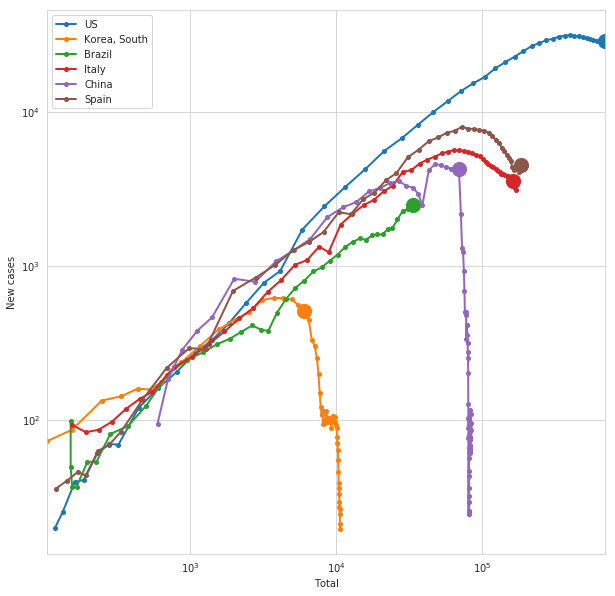

In [102]:
_, ax = plt.subplots(1, 1, figsize=(10, 10))
countries = ['US','Korea, South', 'Brazil', 'Italy', 'China', 'Spain']
for c in countries:
    plot_data(c, ax=ax, lw=2, marker='o', markersize=4)
    ax.scatter(breakdown[c].Total.astype(float), breakdown[c].New.values.astype(float), s=200)
    plt.yscale('log')
    plt.xscale('log')

ax.set_ylabel('New cases')
ax.legend(countries);

In [103]:
_df = infect['Brazil'].copy()
_df.index = pd.timedelta_range(start='1 day', periods=len(_df))
_df

,Total,New,log_New,log_Total,Infect,origin_d
1 days,151.000000,99.000000,4.595120,5.017280,0.000000,6.803545
2 days,151.000000,49.500000,3.901973,5.017280,0.000000,6.355980
3 days,154.666667,36.666667,3.601868,5.041272,0.023992,6.195795
4 days,166.000000,37.000000,3.610918,5.111988,0.070716,6.258686
5 days,197.000000,53.800000,3.985273,5.283204,0.171216,6.617752
6 days,226.166667,53.333333,3.976562,5.421272,0.138068,6.723335
7 days,282.571429,81.285714,4.397970,5.643931,0.222659,7.155145
8 days,374.285714,91.714286,4.518678,5.925019,0.281088,7.451463
9 days,498.571429,124.285714,4.822583,6.211747,0.286727,7.864039
10 days,696.285714,197.714286,5.286823,6.545760,0.334013,8.414123


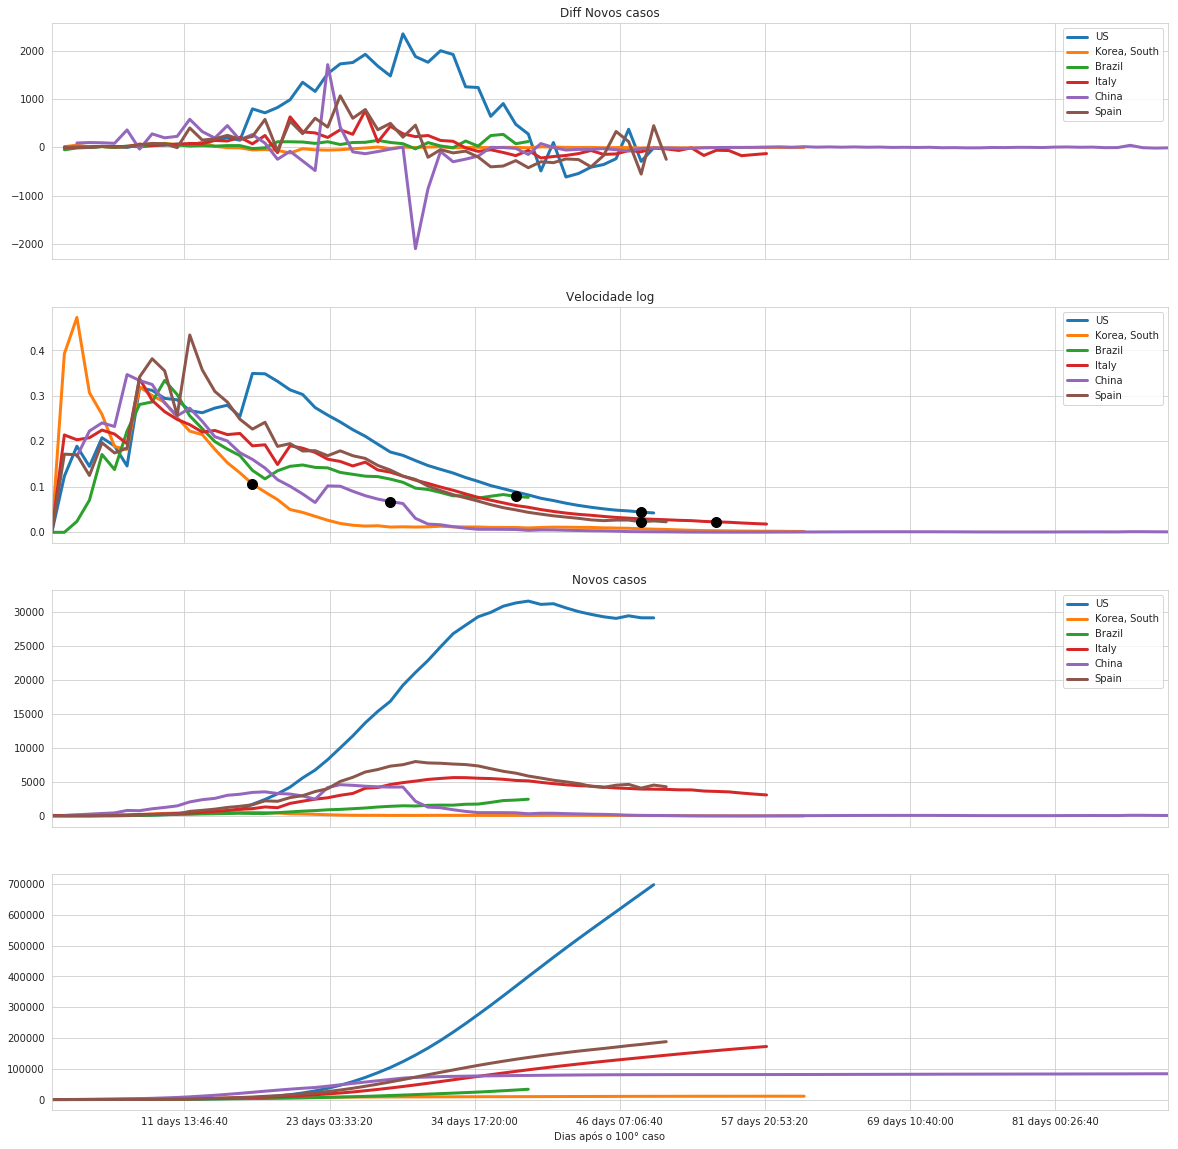

In [117]:
%matplotlib inline
fig, ax = plt.subplots(4, 1, figsize=(20, 20), sharex=True)
countries = ['US','Korea, South', 'Brazil', 'Italy', 'China', 'Spain']
for c in countries:
    _df = infect[c].copy()
    _df.index = pd.timedelta_range(start='1 day', periods=len(_df))
    
    _df.New.diff().plot(ax=ax[0], lw=3)
    _df.Infect.plot(ax=ax[1],lw=3)
    _df.New.plot(ax=ax[2], lw=3);
#     if c == 'Brazil':
    _df.New.cumsum().plot(ax=ax[3], lw=3);
    
for c in countries:
    
    _df = infect[c].copy()
    breakdown_day = pd.Timestamp(breakdown[c].index[0]) - infect[c].index[0]
    _df.index = pd.timedelta_range(start='1 day', periods=len(_df))

    value = _df.loc[breakdown_day]
    pd.DataFrame({
        'x': breakdown_day,
        'y': value.Infect
    }, index=[breakdown_day]).plot(x='x', y='y', ax=ax[1], marker='o', ms=10, c='k')

    
ax[0].legend(countries)
ax[1].legend(countries)
ax[2].legend(countries)


ax[0].set_title('Diff Novos casos')
ax[1].set_title('Velocidade log');
ax[2].set_title('Novos casos');

plt.xlabel('Dias após o 100° caso');

## Parece que esse indice pode ser utilizado para inferir qual seria o momento da saída do comportamento exponencial.

In [105]:
import pickle

pickle.dump(infect, open('../data/processed/infect.pkl', 'wb'))
pickle.dump(breakdown, open('../data/processed/breakdown.pkl', 'wb'))


In [106]:
breakdown['China']

,Total,New,log_New,log_Total,Infect,origin_d
2020-02-19,69491.857143,4265.714286,8.358365,11.148965,0.063349,13.934191


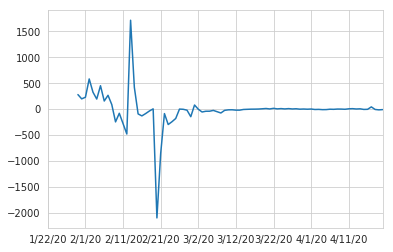

In [107]:
df.loc['China'][4:].rolling(7).mean().diff().diff().plot()

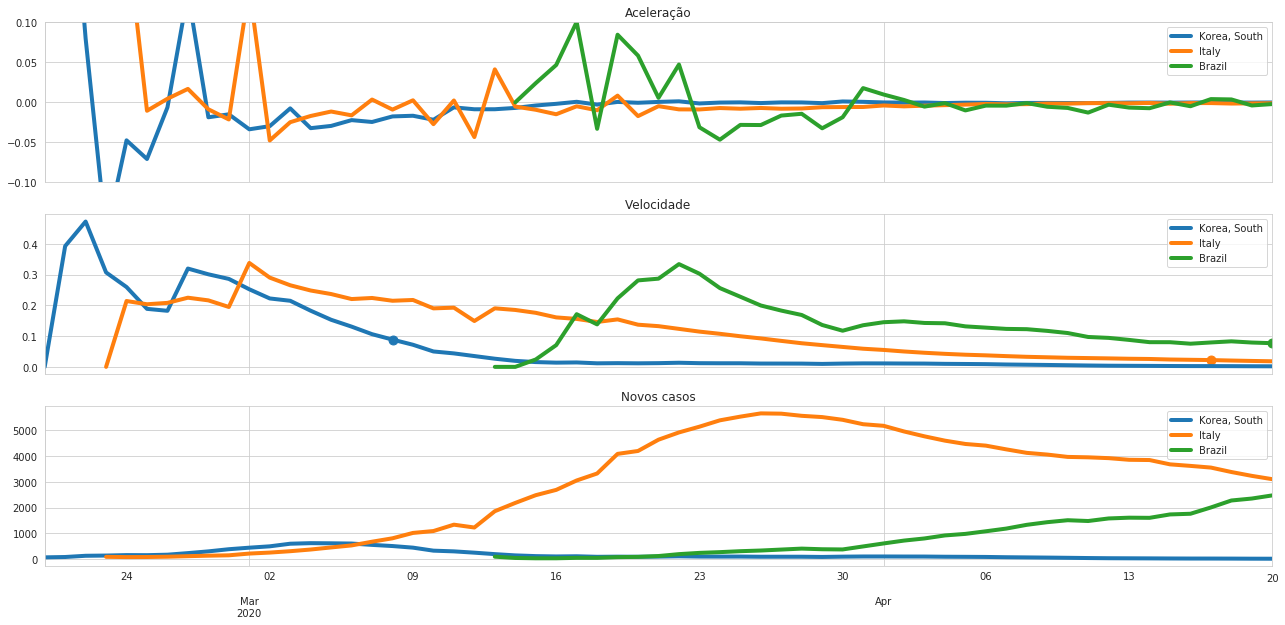

In [108]:
fig, ax = plt.subplots(3, 1, figsize=(22, 10), sharex=True)
countries = ['Korea, South', 'Italy', 'Brazil']
for c in countries:
    infect[c].Infect.diff().plot(ax=ax[0],lw=4)
    infect[c].Infect.plot(ax=ax[1],lw=4)
    infect[c].New.plot(ax=ax[2], lw=4);
    try:
        val = infect[c].Infect.loc[pd.Timestamp(breakdown[c].index[0])]
        ax[1].scatter(breakdown[c].index[0], val, s=80)
    except KeyError:
        pass
        
ax[0].set_ylim([-0.1, 0.1])   
ax[0].legend(countries)
ax[1].legend(countries)
ax[2].legend(countries)

ax[0].set_title('Aceleração')
ax[1].set_title('Velocidade');
ax[2].set_title('Novos casos');
